<a href="https://colab.research.google.com/github/nyp-sit/iti107/blob/main/session-2/using_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pretrained CNN models

Welcome to this week's programming exercise. We have covered many different Convolutional Neural Network architectures such as VGG, ResNet, Inception and MobileNet. It is time to see them in action. 

At the end of this exercise, you will be able to: 
- load pretrained models of some popular Convolutional Neural Networks and use them to classify images
- identify some of the architecture patterns in the popular Convolutional Neural Network
- compare the inference speed of different models


## Get the sample image

We will use the pretrained model to classify a sample image (a picture of table and chair). Let's go ahead and download the image.

In [4]:
# wget is a linux command available on linux os like Ubuntu
!wget --no-check-certificate https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/iti107/resources/chair_table.png

--2022-10-18 19:54:36--  https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/iti107/resources/chair_table.png
Resolving nyp-aicourse.s3.ap-southeast-1.amazonaws.com... 52.219.124.131
Connecting to nyp-aicourse.s3.ap-southeast-1.amazonaws.com|52.219.124.131|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 126926 (124K) [image/png]
Saving to: `chair_table.png'

     0K .......... .......... .......... .......... .......... 40% 2.61M 0s
    50K .......... .......... .......... .......... .......... 80% 14.5M 0s
   100K .......... .......... ...                             100% 14.2M=0.02s

2022-10-18 19:54:36 (5.11 MB/s) - `chair_table.png' saved [126926/126926]



In [5]:
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

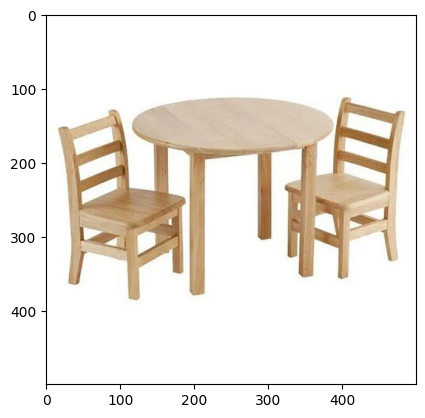

In [6]:
# Read Images 
img_path = 'chair_table.png'
img = tf.keras.utils.load_img(img_path)
  
# display Images 
plt.imshow(img) 

## VGG16 - Pretrained Model

In [7]:
from tensorflow.keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553476096/553467096 [==============================] - 39s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

***Questions***

1. What is the expected input image size?
2. What are the last four layers in VGG-16? 

<details><summary>Click here for answer</summary>
    
1. it is expected to have a height of 224 and width of 224
2. the last 4 layers are flatten (which flattens the 2-D array into 1-D array before feeding to FC layer), and 2 Fully-connected (Dense) layers, and the last layer is a soft-max layer to classify 1000-classes. This is quite typical of a image classifier.

</details>

In [8]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224,224)):
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [9]:
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

49152/35363 [=========================================] - 0s 0us/step


,Predicted Class,Name,Probability
0,n03201208,dining_table,0.988334
1,n03179701,desk,0.004743
2,n03376595,folding_chair,0.001707
3,n04081281,restaurant,0.000965
4,n03018349,china_cabinet,0.000869
5,n04099969,rocking_chair,0.000658
6,n04344873,studio_couch,0.000358
7,n03903868,pedestal,0.000250
8,n03899768,patio,0.000222
9,n03661043,library,0.000105


Notice that we pass in `vgg.preprocess_input` function to preprocess the image before calling `model.predict()`. Different network (e.g. VGG, ResNet, etc) expects the input image to be normalized in different ways, and different models will provide their own preprocess_input() function to perform the normalization.

We also call `np.expand_dims(x, axis=0)` before calling `preprocess_input()` and `predict()`. 

***Question***

1. What does `np.expand_dims(x, axis=0)` do and why do we need it? 
2. Our sample picture consists of both table and chair? What does VGG16 predict? and why do you think it predicts so?
3. Of the top 10 predictions, did you see any prediction about chair? 


<details><summary>Click here for answer</summary>

1. np.expand_dims() increases the number of dimensions and the axis of the new dimension is specified by the axis parameter. In this case, we add in a new axis as axis=0, first axis. This is because the preprocess_input() and predict() function expects the images to be in the shape (samples, height, width, channels), the 1st axis being the batch.

2. It predicts dining table. It probably focus on the object in the middle of the image.

3. Yes, folder chair is one of the top 10 predictions.

</details>

## Resnet50 - Pretrained Model

In [10]:
# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16
from tensorflow.keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

# let's plot the model, instead of using model.summary(), as it is easier to see some of the skip connections
tf.keras.utils.plot_model(resnet50_model, to_file="resnet.png", show_shapes=True)

102981632/102967424 [==============================] - 6s 0us/step
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


***Questions***

1. Can you identify the skip connection block from the model plot()?
2. Look at the last few layers in the ResNet. How are they different from those of VGG-16?

<details><summary>Click here for answer</summary>
    
1. Look for those 'Add' layer (e.g. layer with name add_2). The Add layer adds the skip connection with the previous layer. Notice that the add is done before the Activation function. You can also call plot_model() to get a graphical visualization of the model.

2. ResNet does not use make use of Full-connected layers as classification layers. Instead it replaces the FC layers with GlobalAveragePooling2D. This architecture is very common in more modern architectures.

</details>

In [11]:
# Predict Results
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n03201208,dining_table,0.981002
1,n03376595,folding_chair,0.007545
2,n03179701,desk,0.001955
3,n03903868,pedestal,0.001811
4,n03018349,china_cabinet,0.001110
5,n03899768,patio,0.000919
6,n03337140,file,0.000576
7,n04429376,throne,0.000387
8,n04344873,studio_couch,0.000369
9,n03661043,library,0.000269


## MobileNet v2 - Pretrained Model

In [27]:
from tensorflow.keras.applications import MobileNetV3Small
mobilenet_v3_model = MobileNetV3Small(weights='imagenet')

# print the model summary
tf.keras.utils.plot_model(mobilenet_v3_model, to_file='mobilenet_v2.png', show_shapes=True)

10747904/10734624 [==============================] - 1s 0us/step
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


***Questions***

1. Can you identify the Depth-wise Convolution layer from the model summary?

<details><summary>Click here for answer</summary>

1. For example, the layer called 'block_1_depthwise'. 

    
</details>

In [31]:
predict_image(mobilenet_v3_model, img_path, mobilenet_v3.preprocess_input, mobilenet_v3.decode_predictions)

,Predicted Class,Name,Probability
0,n03201208,dining_table,0.779950
1,n03376595,folding_chair,0.036328
2,n03903868,pedestal,0.013139
3,n03992509,potter's_wheel,0.010111
4,n04099969,rocking_chair,0.007414
5,n04336792,stretcher,0.007139
6,n04447861,toilet_seat,0.005006
7,n03131574,crib,0.004421
8,n03179701,desk,0.003939
9,n02804414,bassinet,0.002516


### Speed comparison 

We compare the inference speed of the three different models. Which one has the fastest inference speed?

In [20]:
%timeit predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

55.7 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

60.3 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%timeit predict_image(mobilenet_v3_model, img_path, mobilenet_v3.preprocess_input, mobilenet_v3.decode_predictions)

63.5 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
